In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1.1 Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Version_Donat/wetter_zurich_bereinigt.csv"
df_wetter1= pd.read_csv(url, sep=";", encoding="utf-8")

# 1.2 Spaltennamen anpassen (gemäß der Legende)
parameter_mapping1 = {
    "fu3010h1": "Böenspitze_kmh",
    "gre000h0": "Globalstrahlung_Wm2",
    "tre200h0": "Temperatur_C",
    "rre150h0": "Niederschlag_mm",
    "fu3010h0": "Windgeschwindigkeit_kmh"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)


# 1.3 'time' in Datumsformat umwandeln
df_wetter1['time'] = pd.to_datetime(df_wetter1['time'], format='%Y%m%d%H', errors='coerce')

# 1.4 Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['time'].dt.year == 2024]

# 1.5 Ersten 10 Zeilen anzeigen
display(df_wetter1.head(10))

# 1.6 Anzahl der Einträge für das Jahr 2024
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")




,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh
17520,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4
17521,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9
17522,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4
17523,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4
17524,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5
17525,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6
17526,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4
17527,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9
17528,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9
17529,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1


Anzahl der Einträge für 2024: 8784


In [ ]:
# 2.1 Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Version_Donat/Wetter_Zurich_Schnee_Nebel_Hagel.csv"
df_wetter2 = pd.read_csv(url2, sep=";", encoding="utf-8")

# 2.2 Spaltennamen anpassen (gemäß der Legende)
parameter_mapping2 = {
    "hns000d0": "Neuschneehöhe_cm",
    "hto000d0": "Schneehöhe_Morgenmessung_6_UTC_cm",
    "w3p002d0": "Tag_mit_Hagel",
    "w5p002d0": "Tag_mit_Nebel"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "stn2", "time": "time2"})

# 2.3 Konvertiere die 'time'-Spalte in df_wetter2 in das Datetime-Format
df_wetter2['time2'] = pd.to_datetime(df_wetter2['time2'], format='%Y%m%d', errors='coerce')


#  2.4 Ersten 10 Zeilen anzeigen
display(df_wetter2.head(10))

,stn2,time2,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,KLO,2024-01-01,0,0,0,0
1,KLO,2024-01-02,0,0,0,0
2,KLO,2024-01-03,0,0,0,0
3,KLO,2024-01-04,0,0,0,0
4,KLO,2024-01-05,0,0,0,0
5,KLO,2024-01-06,0,0,0,0
6,KLO,2024-01-07,0,0,0,0
7,KLO,2024-01-08,0,0,0,0
8,KLO,2024-01-09,2,0,0,0
9,KLO,2024-01-10,0,2,0,0


In [28]:
#Beide Wetter Datensätze mergen
# 3.1 Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages in df_wetter1
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 3.2 Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3.3 Entferne die Spalten 'stn2' und 'time2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['stn2', 'time2'])

# 3.4 Zeige die ersten 10 Zeilen des kombinierten DataFrames an
display(df_wetter.head(10))

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4,0,0,0,0
1,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9,0,0,0,0
2,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4,0,0,0,0
3,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4,0,0,0,0
4,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5,0,0,0,0
5,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6,0,0,0,0
6,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4,0,0,0,0
7,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9,0,0,0,0
8,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9,0,0,0,0
9,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1,0,0,0,0


In [31]:
# Alle Zeilen mit NaN-Werten extrahieren
df_nan = df_wetter[df_wetter.isna().any(axis=1)]

# Anzahl der NaN-Werte pro Spalte anzeigen
nan_summary = df_wetter.isna().sum()

# Zeilen mit NaN-Werten anzeigen
display(df_nan.head(10))

# Anzahl der NaN-Werte pro Spalte ausgeben
print("Anzahl der NaN-Werte pro Spalte:")
print(nan_summary)


,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel


Anzahl der NaN-Werte pro Spalte:
stn                                  0
time                                 0
Böenspitze_kmh                       0
Globalstrahlung_Wm2                  0
Temperatur_C                         0
Niederschlag_mm                      0
Windgeschwindigkeit_kmh              0
Neuschneehöhe_cm                     0
Schneehöhe_Morgenmessung_6_UTC_cm    0
Tag_mit_Hagel                        0
Tag_mit_Nebel                        0
dtype: int64


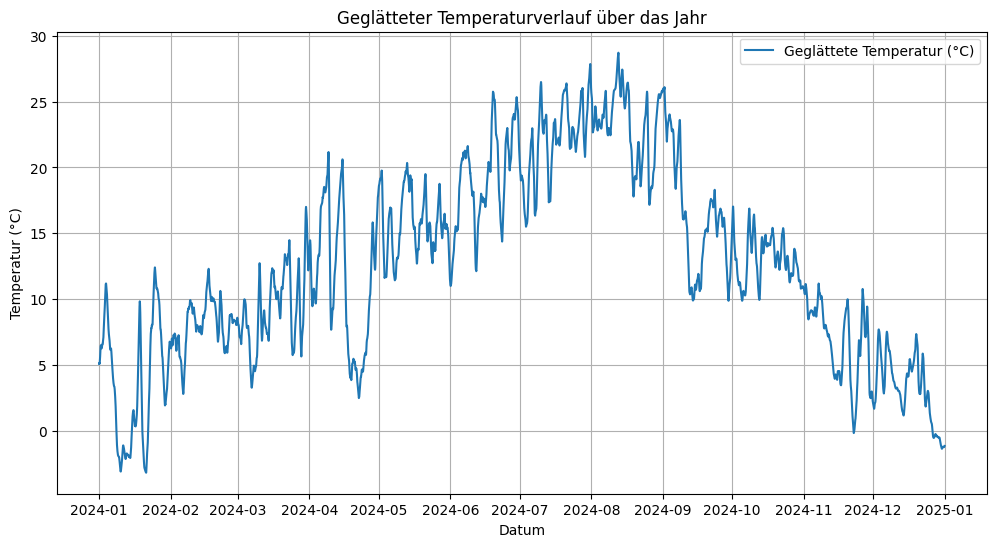

In [24]:
import matplotlib.dates as mdates
# Gleitender Mittelwert (Moving Average) über 24 Stunden zur Glättung
df_wetter['Temperatur_Glatt'] = df_wetter['Temperatur_C'].rolling(window=24, min_periods=1).mean()

# Liniendiagramm mit geglätteten Werten
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_wetter['time'], y=df_wetter['Temperatur_Glatt'], label='Geglättete Temperatur (°C)')

# Achsentitel und Diagrammtitel setzen
plt.xlabel('Datum')
plt.ylabel('Temperatur (°C)')
plt.title('Geglätteter Temperaturverlauf über das Jahr')

# X-Achse so formatieren, dass jeder Rasterpunkt einen Monat zeigt
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Jeden Monat einen Rasterpunkt setzen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format als "YYYY-MM"

# Legende und Raster hinzufügen
plt.legend()
plt.grid()

# Diagramm anzeigen
plt.show()

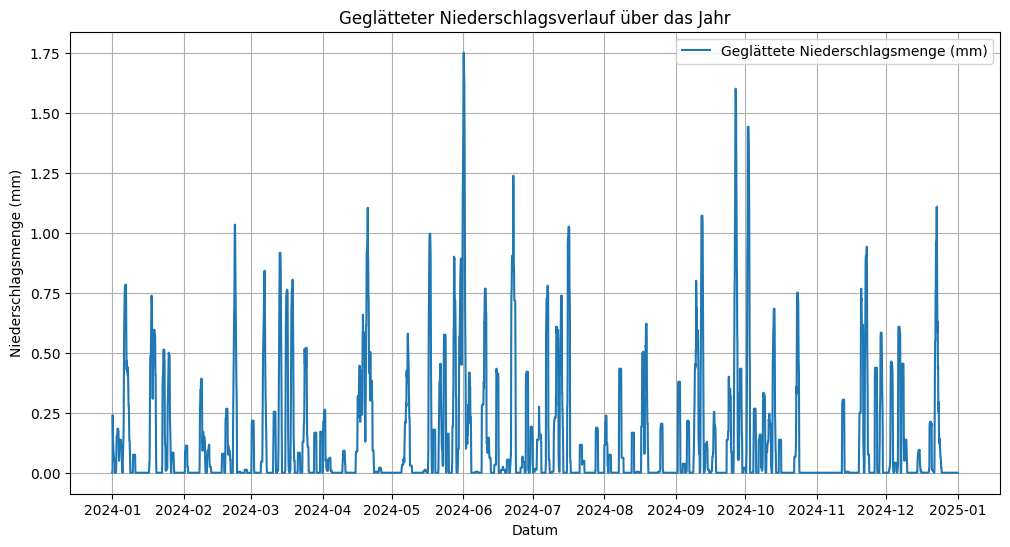

In [25]:
import matplotlib.dates as mdates

# Gleitender Mittelwert (Moving Average) über 24 Stunden zur Glättung der Niederschlagsmenge
df_wetter['Niederschlag_Glatt'] = df_wetter['Niederschlag_mm'].rolling(window=24, min_periods=1).mean()

# Liniendiagramm mit geglätteten Werten für die Niederschlagsmenge
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_wetter['time'], y=df_wetter['Niederschlag_Glatt'], label='Geglättete Niederschlagsmenge (mm)')

# Achsentitel und Diagrammtitel setzen
plt.xlabel('Datum')
plt.ylabel('Niederschlagsmenge (mm)')
plt.title('Geglätteter Niederschlagsverlauf über das Jahr')

# X-Achse so formatieren, dass jeder Rasterpunkt einen Monat zeigt
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Jeden Monat einen Rasterpunkt setzen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format als "YYYY-MM"

# Legende und Raster hinzufügen
plt.legend()
plt.grid()

# Diagramm anzeigen
plt.show()
